In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### 2. X train observed

In [3]:
import utils

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files()
keys = [1, 2, 3]

In [4]:
frames_train_estimated = [X_train_estimated_a.drop(columns=["date_calc"]), X_train_observed_a, X_test_estimated_a.drop(columns=["date_calc"])]
X_frames_a = pd.concat(frames_train_estimated, keys=keys)
X_frames_a.reset_index(level=0, inplace=True, names='frame_type')

train_a = train_a.rename(columns={'time': 'date_forecast'})
X_y_a = X_frames_a.merge(train_a, on='date_forecast', how='inner')
X_y_a.reset_index(drop=True, inplace=True)

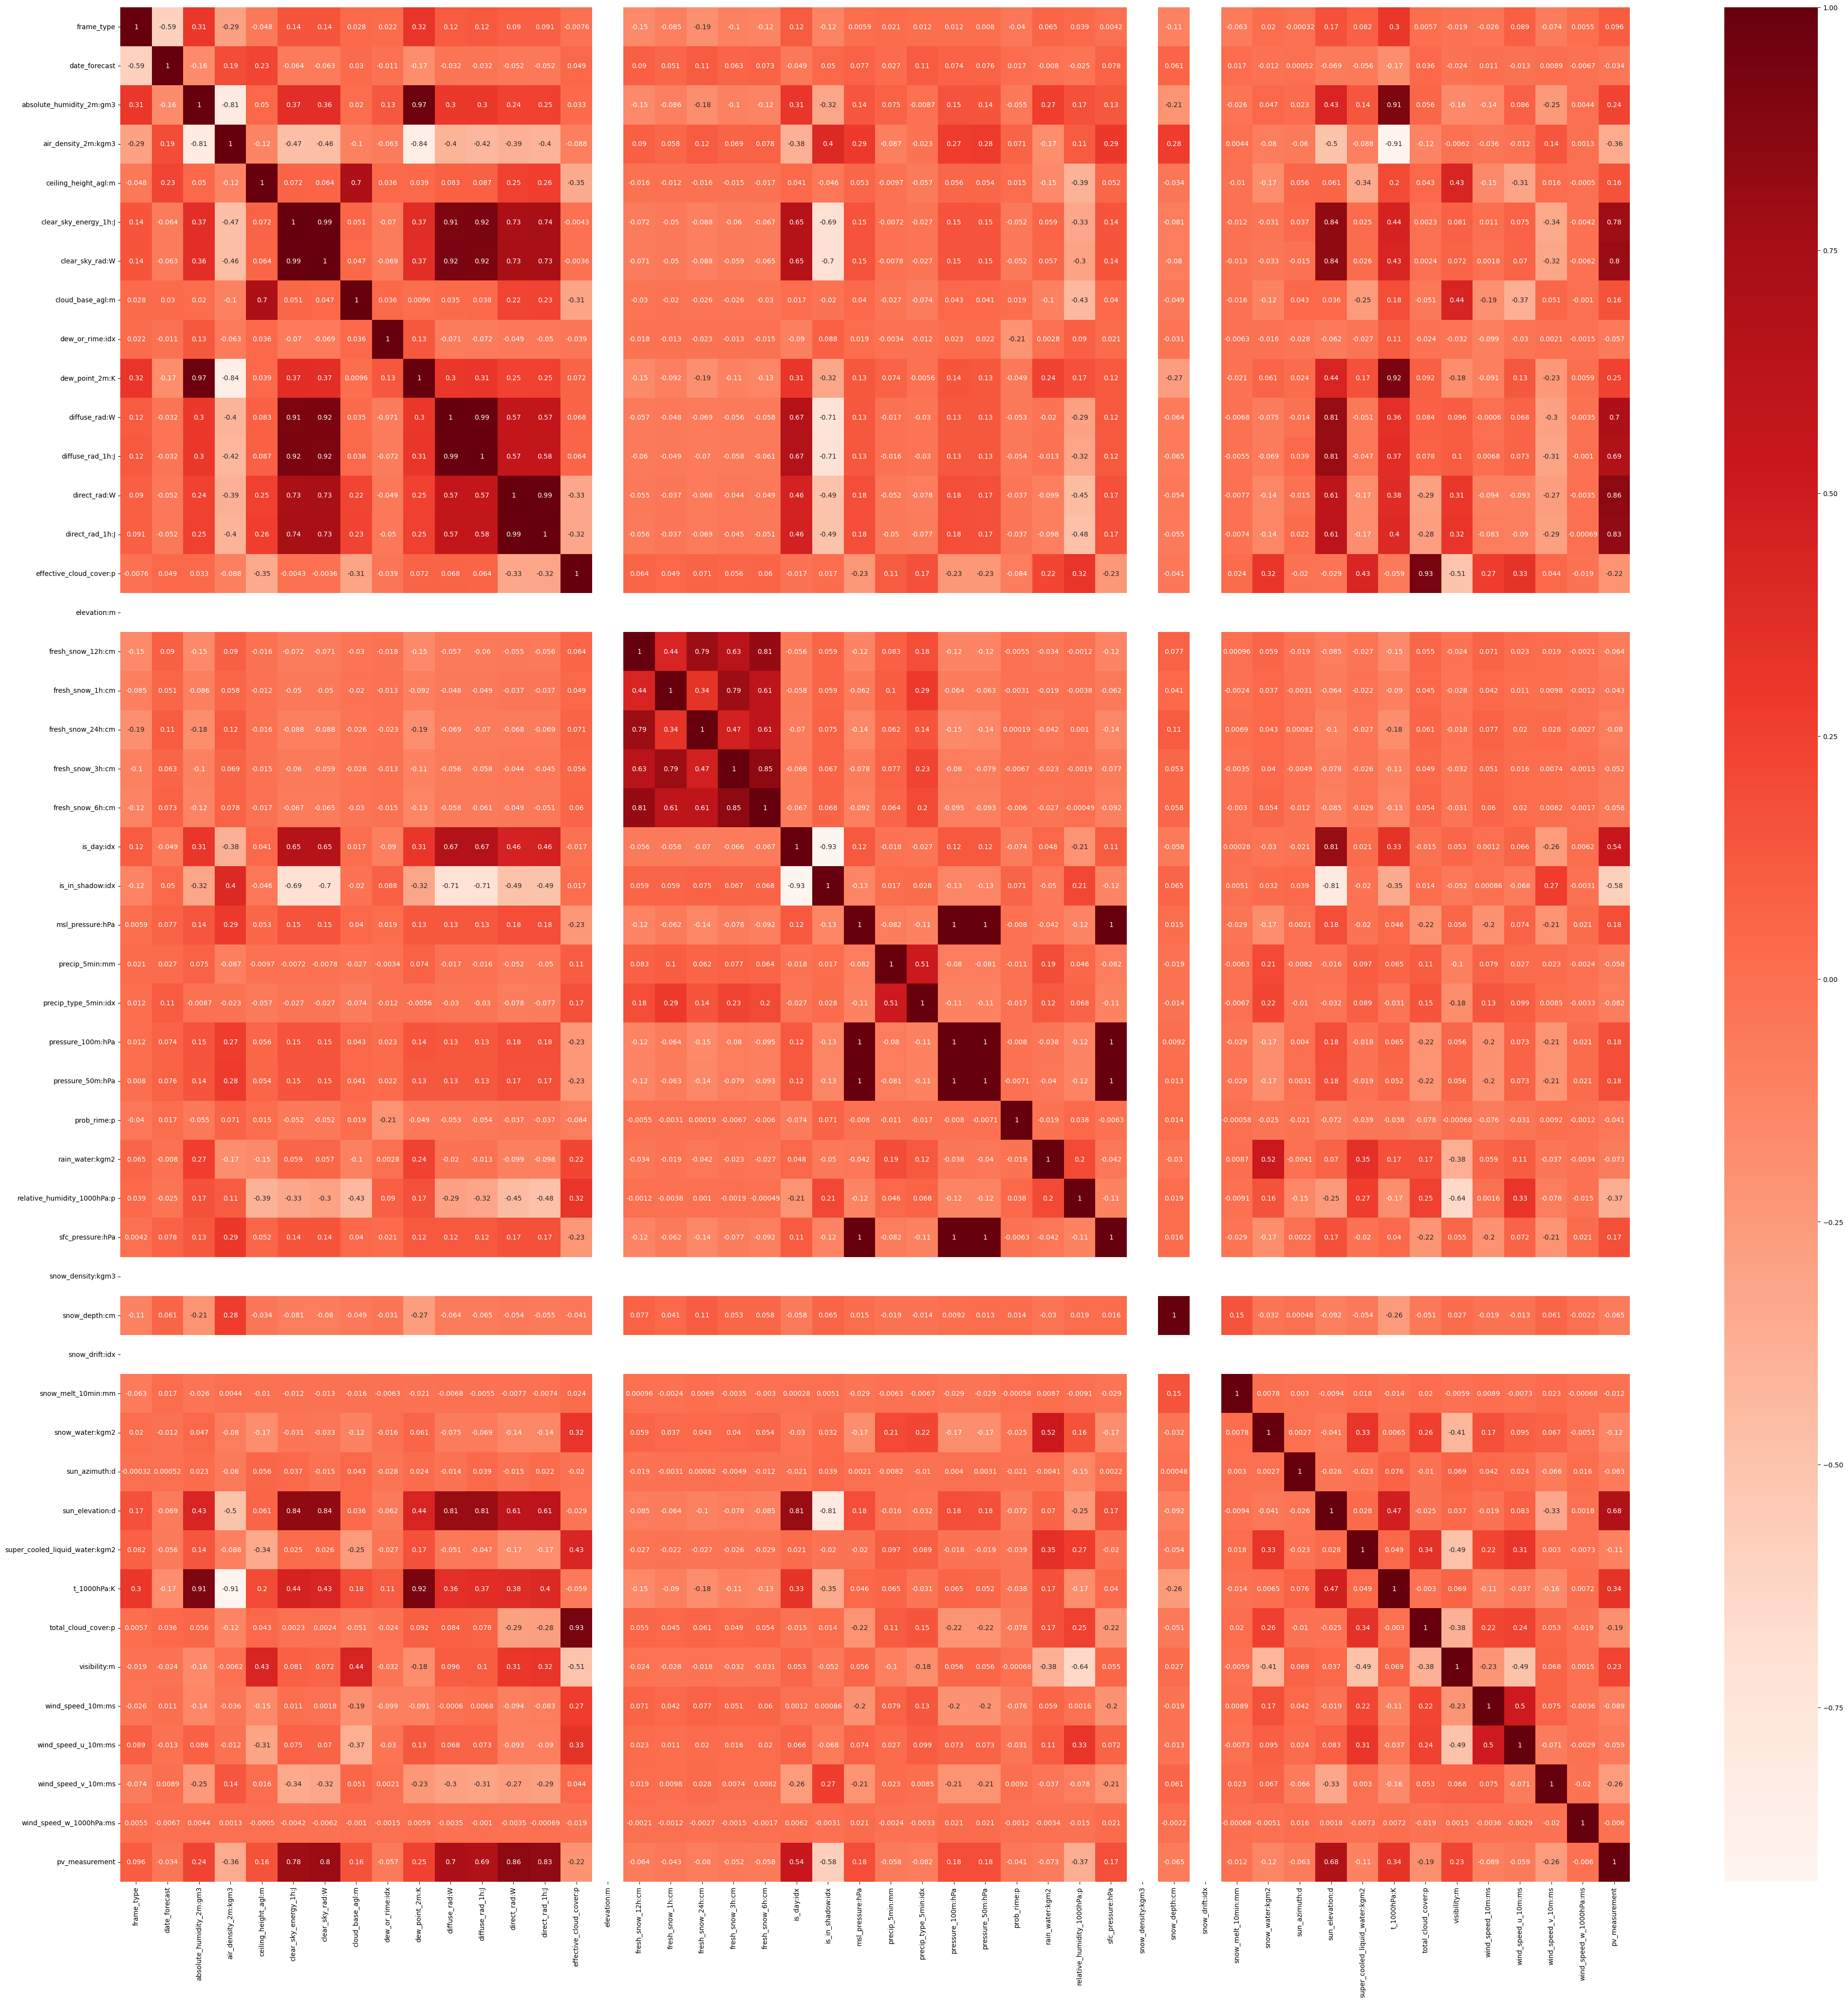

In [5]:
utils.build_corr_matrix(X_y_a, figsize=(50,50))

Ce qui est le plus corrélé pour pv_measurement:

- clear_sky_energy_1h:J: clear sky energy of previous time period, available up to 24h [J/m2]
- clear_sky_rad:W: clear sky radiation flux [W/m2]
- diffuse_rad:W: diffuse radiation flux [W/m2]
- diffuse_rad_1h:J: 
- direct_rad:W: direct radiation flux [W/m2]

In [6]:
frames_train_estimated = [X_train_estimated_b.drop(columns=["date_calc"]), X_train_observed_b, X_test_estimated_b.drop(columns=["date_calc"])]
X_frames_b = pd.concat(frames_train_estimated, keys=keys)
X_frames_b.reset_index(level=0, inplace=True, names='frame_type')

train_b = train_b.rename(columns={'time': 'date_forecast'})
X_y_b = X_frames_b.merge(train_b.dropna(), on='date_forecast', how='inner')
X_y_b.reset_index(drop=True, inplace=True)

frames_train_estimated = [X_train_estimated_c.drop(columns=["date_calc"]), X_train_observed_c, X_test_estimated_c.drop(columns=["date_calc"])]
X_frames_c = pd.concat(frames_train_estimated, keys=keys)
X_frames_c.reset_index(level=0, inplace=True, names='frame_type')

train_c = train_c.rename(columns={'time': 'date_forecast'})
X_y_c = X_frames_c.merge(train_c.dropna(), on='date_forecast', how='inner')
X_y_c.reset_index(drop=True, inplace=True)

frames_location= [X_y_a, X_y_b, X_y_c]
X_y = pd.concat(frames_location, keys=keys)
X_y.reset_index(level=0, inplace=True, names='location')

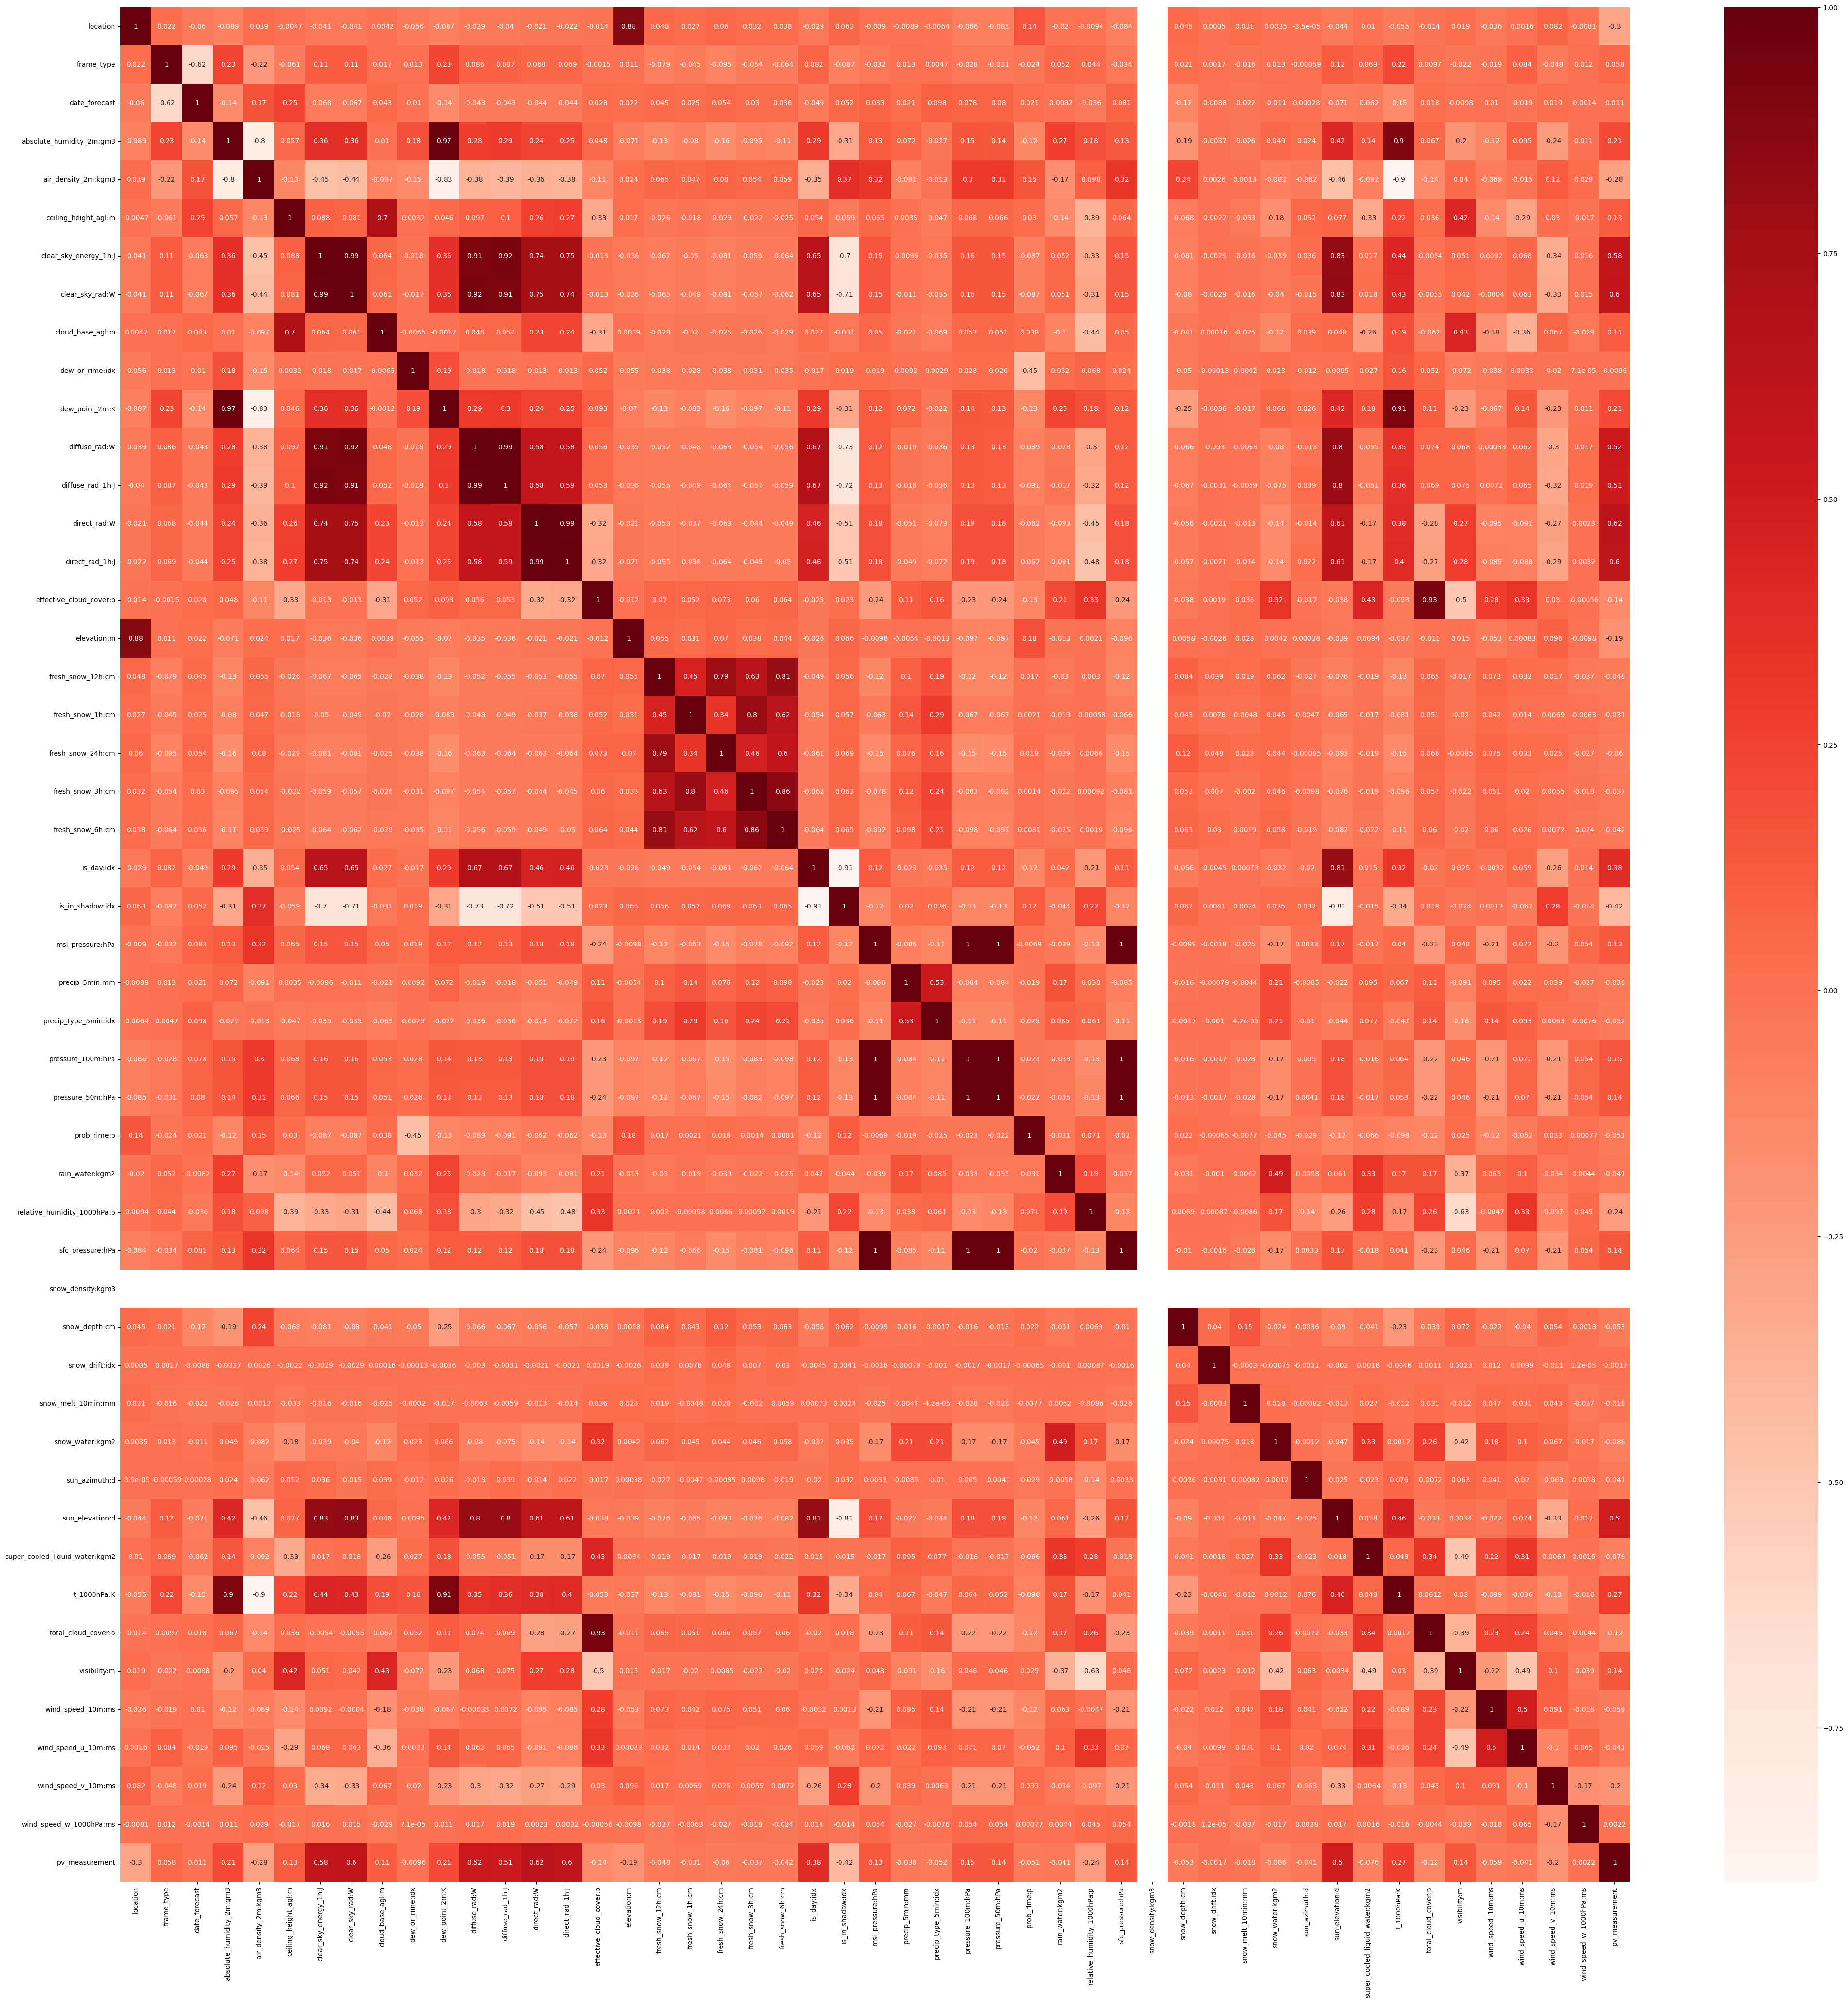

In [7]:
utils.build_corr_matrix(X_y, figsize=(50,50))

Ça colle avec le dernier résultat mais les coeff de corrélations sont plus faible lorsque l'on regarde sur les trois localisations. Mais la localisation semble pas impacter le résultat.